# Algoritmos Genéticos

## Dependencias

In [5]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

## Imagen Objetivo

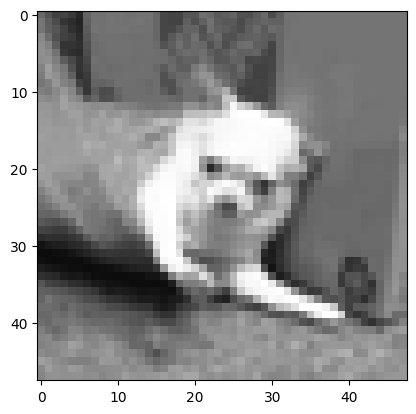

In [12]:
IMAGE_PATH = 'objective.jpg'
IMG_RESOLUTION = (48, 48)
img_arr = np.array(Image.open(IMAGE_PATH).convert('L').resize(IMG_RESOLUTION))
plt.imshow(img_arr, cmap='gray', vmin=0, vmax=255)
plt.show()

## Algoritmo Genético

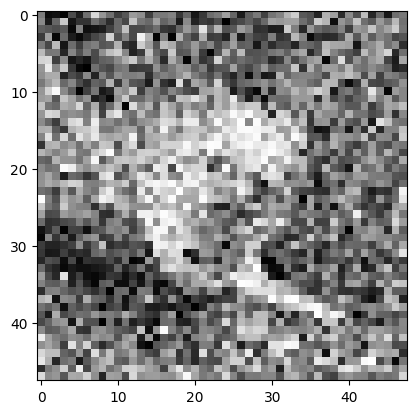

In [13]:
# 1. Crear una generación de 100 individuos 128x128, con valores aleatorios entre 0 y 255
def create_population(population_size, img_resolution):
    population = []
    for i in range(population_size):
        population.append(np.random.randint(0, 256, img_resolution))
    return population

# 2. Calcular el fitness de cada individuo con la distancia euclidiana

def euclidean_distance(img1, img2):
    return np.sqrt(np.sum((img1 - img2) ** 2))

def calculate_fitness(population, img_arr):
    fitness = []
    for i in range(len(population)):
        fitness.append(euclidean_distance(population[i], img_arr))
    return fitness

# 3. Seleccionar los 10 mejores individuos

def select_best_individuals(population, fitness, n):
    best_individuals = []
    for i in range(n):
        best_individuals.append(population[fitness.index(min(fitness))])
        fitness[fitness.index(min(fitness))] = float('inf')
    return best_individuals

# 4. Cruzar los 10 mejores individuos para obtener 100 nuevos individuos

def crossover(best_individuals, n):
    new_individuals = []
    for i in range(n):
        parent1 = best_individuals[np.random.randint(0, len(best_individuals))]
        parent2 = best_individuals[np.random.randint(0, len(best_individuals))]
        new_individual = np.zeros(IMG_RESOLUTION)
        for i in range(IMG_RESOLUTION[0]):
            for j in range(IMG_RESOLUTION[1]):
                if np.random.random() < 0.5:
                    new_individual[i][j] = parent1[i][j]
                else:
                    new_individual[i][j] = parent2[i][j]
        new_individuals.append(new_individual)
    return new_individuals

# 5. Mutar los 100 nuevos individuos con una probabilidad del 1%

def mutate(new_individuals, mutation_rate):
    for i in range(len(new_individuals)):
        for j in range(IMG_RESOLUTION[0]):
            for k in range(IMG_RESOLUTION[1]):
                if np.random.random() < mutation_rate:
                    new_individuals[i][j][k] = np.random.randint(0, 256)
    return new_individuals

# 6. Reemplazar la generación anterior con los 100 nuevos individuos

def replace_population(population, new_individuals):
    return new_individuals

# 7. Repetir los pasos 2-6 por 100 generaciones

def genetic_algorithm(population_size, img_arr, img_resolution, generations):
    population = create_population(population_size, img_resolution)
    for i in range(generations):
        fitness = calculate_fitness(population, img_arr)
        best_individuals = select_best_individuals(population, fitness, 10)
        new_individuals = crossover(best_individuals, population_size)
        new_individuals = mutate(new_individuals, 0.01)
        population = replace_population(population, new_individuals)
    return population

# 8. Mostrar el mejor individuo de la última generación

best_individual = genetic_algorithm(100, img_arr, IMG_RESOLUTION, 200)
plt.imshow(best_individual[0], cmap='gray', vmin=0, vmax=255)
plt.show()

